In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import sncosmo
#import jp as sncosmo
import astropy.units as u
import glob
import numpy as np
import os.path
from tabulate import tabulate


#sdss = sncosmo.get_magsystem('sdss')

salt2 = sncosmo.SALT2Source(modeldir=None, m0file='med.dat', m1file='var.dat', clfile='salt2_color_correction.dat', cdfile='salt2_color_dispersion.dat', errscalefile='salt2_lc_dispersion_scaling.dat', lcrv00file='salt2_lc_relative_variance_0.dat', lcrv11file='salt2_lc_relative_variance_1.dat', lcrv01file='salt2_lc_relative_covariance_01.dat', name=None, version=None)
#ab = sncosmo.get_magsystem('ab')
chi_quad_ndof = []
names = glob.glob("*.txt")

#print(names)
for j in range(0, len(names)):
    #j = 4
    print(names[j])

    data = sncosmo.read_lc(names[j])
    
    #for i in range(0, len(data['flux'])):
        
    #data['fluxerr'][i] = 2*np.log(10)*(10**((data['zp'][i] - data['flux'][i])/2.5))*data['fluxerr'][i]/2.5 #flux error conversion
    #data['fluxerr'][i] = (2*np.log(10)/5)*10**(2*(data['zp'][i] - data['flux'][i])/5)*data['fluxerr'][i]
        
    #data['flux'][i] = csp.band_mag_to_flux(data['flux'][i], 'cspr')
    
    #print(data['flux'])
    model = sncosmo.Model(source=salt2)
    
    #model.bandmag('cspb', 'csp')
    model.set(z=data['redshift'][0])  # set the model's redshift
    
    result, fitted_model = sncosmo.fit_lc( data, model, ['t0', 'x0', 'x1', 'c'])
               
    index = []
    
    for i in range(0,len(data['time'])):
        
        if data['time'][i] - result.parameters[1] > 50:
            
            index.append(i)
                
        if data['time'][i] - result.parameters[1] < -20:
            
            index.append(i)
        
        
    teste = np.delete(data, index , axis=0)           
    print(data['redshift'][0])
    model2 = sncosmo.Model(source=salt2)
    model.set(z=data['redshift'][0])  # set the model's redshift
    
    result2, fitted_model2 = sncosmo.fit_lc(teste, model2, ['t0', 'x0', 'x1', 'c'])
    
    
    chi_quad_ndof.append(result2.chisq/result2.ndof)
                
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()
print(chi_quad_ndof)
print(np.mean(chi_quad_ndof), np.std(chi_quad_ndof))
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()

SN2561_originalgr.txt
0.11819
[4.9351387040711865]
4.9351387040711865 0.0


In [2]:
from sncosmo import photdata as pd

In [3]:
pd.PhotometricData(data).flux

array([ 2.204 , 14.54  , 34.48  , 38.26  , 39.01  , 34.86  , 30.28  ,
       11.48  ,  7.643 ,  5.855 ,  5.412 ,  5.668 ,  3.685 ,  4.318 ,
        3.428 ,  3.654 ,  3.409 ,  2.478 ,  2.741 ,  0.5023,  1.98  ,
        1.092 ,  2.108 ,  1.847 ,  3.32  , 16.18  , 38.87  , 45.54  ,
       45.62  , 42.81  , 43.05  , 16.57  , 17.58  , 17.43  , 19.47  ,
       14.24  , 13.92  , 12.28  , 12.59  , 10.5   , 10.83  ,  9.727 ,
        7.443 ,  4.179 ,  5.257 ,  4.607 ,  5.538 ,  4.194 ,  3.325 ])

<IPython.core.display.Javascript object>


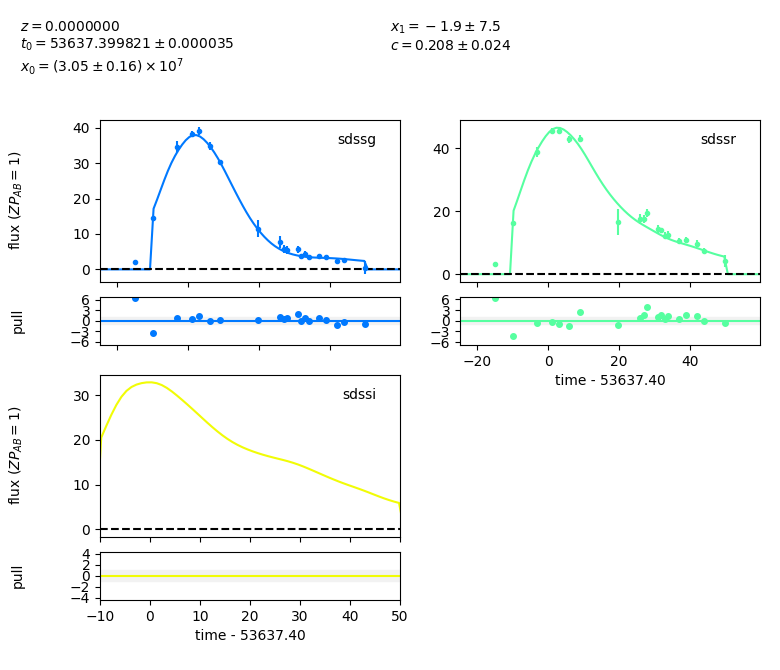

In [6]:
%matplotlib notebook
sncosmo.plot_lc(teste, model=fitted_model2, errors=result2.errors, zp = 1, zpsys = 'ab')
plt.xlim(-10, 50)
plt.show()

In [5]:
print(ab)

NameError: name 'ab' is not defined

In [ ]:
data_list = pd.PhotometricData(data).normalized(zp=0, zpsys='ab')

In [ ]:
data["band"]

In [ ]:
table = []

for i in range(0,len(data_list.time)):

    table.append((data_list.time[i], data["band"][i], data_list.flux[i], data_list.fluxerr[i], data_list.zp[i], data_list.zpsys[i], data['redshift'][0]))   

In [ ]:
save_path = "/home/joao/Documentos/templates/analise_superficies/" 

In [ ]:
name_of_file = "sncosmonorm"

completeName = os.path.join(save_path, name_of_file+".txt")    

header = "#time    band  flux        fluxerr      zp     zpsys redshift"

f = open(completeName, 'w')               
f.write(header + "\n")
f.write(tabulate(table, tablefmt="plain"))
f.close()